In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [83]:
# load package for loading data
import pandas as pd
import random

In [84]:
housing_dataset = pd.read_csv("boston_housing.csv")
housing_dataset.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [85]:

X = housing_dataset[['RM']]
y = housing_dataset[['MEDV']]
noise_x = np.random.normal(0, 1, X.shape)
noise_y = np.random.normal(0, 1, y.shape)
X = X.values
y = y.values.flatten()

In [86]:
# load package for spliting data
from sklearn.model_selection import train_test_split

In [87]:
# X = feature
# y = label
# X |-> y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Data Visualization

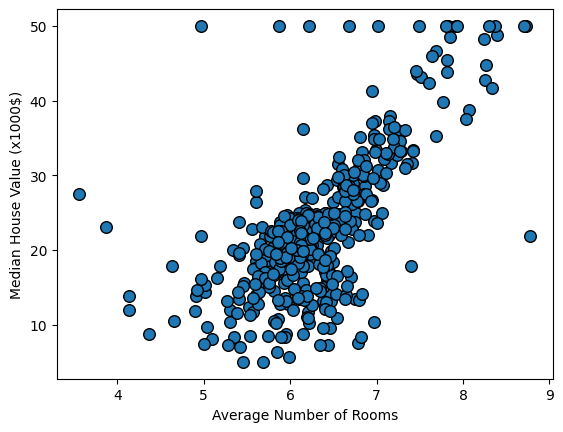

In [88]:
# visualize data
# xlabel: 'Average Number of Rooms'; yla bel: 'Median House Value (x1000$)'

plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='black', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
# plt.xlabel('...')
# plt.ylabel('...')
plt.show()

### Linear Regression (Base)

In [ ]:
class LinearRegressionBase:
    def __init__(self):
        self.w = None
    
    # Return label
    def predict(self, X):
        return X.dot(self.w[1:]) + self.w[0]

    # 
    def fit(self, X, y):
        # Initialize a vector consists of 1 1-column  
        one = np.ones((X.shape[0], 1))
        Xbar = np.concatenate((one, X), axis=1)
        

        A = np.dot(Xbar.T, Xbar)
        b = np.dot(Xbar.T, y)
        # Pseudo Inverse
        # w = A.PInv * b
        self.w = np.dot(np.linalg.pinv(A), b)

### Gradient Descent

In [ ]:
class GradientDescent(LinearRegressionBase):
    def __init__(self, eta=0.001, max_iter=20, random_state=42):
        super().__init__()
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.costs = []

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])

        self.costs = []
        for iter_i in range(self.max_iter):
            y_pred = self.predict(X)
            diff = y - y_pred

            self.w[0] += self.eta * np.sum(diff)
            self.w[1:] += self.eta * np.dot(X.T, diff)
            J = 1/2 * np.sum(diff ** 2)
            self.costs.append(J)

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

In [ ]:
# Initialize the model
reg_GD = GradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

# 1e-4

Visualize the prediction of Gradient Descent model on Training Data

In [ ]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=3, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [ ]:
class StochasticGradientDescent(GradientDescent):
    def __init__(self, eta=0.001, max_iter=200, random_state=42):
        super().__init__(eta, max_iter, random_state)

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        self.costs = []
        for iter_i in range(self.max_iter):
            J = 0.0
            for i, x in enumerate(X):  
                y_pred = self.predict(np.array([x]))
                diff = y[i] - y_pred
                self.w[0] += self.eta * diff
                self.w[1:] += self.eta * x * diff
                J += 1/2 * diff ** 2
            self.costs.append(J)

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [ ]:
# Initialize the model
reg_SGD = StochasticGradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model
reg_SGD.fit(X_train, y_train)

plt.plot(range(1, len(reg_SGD.costs) + 1), reg_SGD.costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()

Visualize the prediction of Stochastic Gradient Descent model on Training Data

In [ ]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

Visualize the prediction of Normal Equation model on Training Data

In [ ]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

In [ ]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=8, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='red', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [ ]:
w_GD = reg_GD.w
w_SGD = reg_SGD.w
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print(w_GD)
print(w_SGD)
print(w_NE)

Performance Comparisons (on Testing Set)

In [ ]:
y_pred_GD = reg_GD.predict(X_test)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test)

In [ ]:
y_pred_NE = reg_NE.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

## Experiment with Standardized Data

In [ ]:
# Re-load the dataset
housing_dataset = pd.read_csv("boston_housing.csv")

In [ ]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [ ]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset[['RM']]
y = housing_dataset[['MEDV']]
X_new = X_new.values
y = y.values.flatten()

In [ ]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

In [ ]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = GradientDescent(eta=1e-4, max_iter=150, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [ ]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = StochasticGradientDescent(eta=1e-3, max_iter=200, random_state=42)

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [ ]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:orange', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=8, label='Normal Equation')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='red', lw=6, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [ ]:
w_GD = reg_GD.w
w_GD

In [ ]:
w_SGD = reg_SGD.w
w_SGD

In [ ]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

In [ ]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [ ]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [ ]:
# Re-load dataset
housing_dataset = pd.read_csv("boston_housing.csv")

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [ ]:
X = housing_dataset.iloc[:, :-1]
y = housing_dataset[['MEDV']]
# [all row, all column except the last one]
X = X.values
y = y.values.flatten()

In [ ]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

In [ ]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-8, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

# Learning rate phù hợp là 1e-8, bởi vì quá trình tối ưu hoá hội tụ nhanh và chính xác khi learning rate =1e-8.

### Stochastic Gradient Descent

In [ ]:
# Initialize the SGD model
reg_SGD = StochasticGradientDescent(eta=1e-6, max_iter=200, random_state=42)

# Train model
reg_SGD.fit(X_train, y_train)

### Normal Equation

In [ ]:
ones = np.ones((X_train.shape[0], 1))
X_train_NE = np.concatenate((ones, X_train), axis = 1)

ones = np.ones((X_test.shape[0], 1))
X_test_NE = np.concatenate((ones, X_test), axis = 1)

In [ ]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_NE, y_train)

### Algorithms Comparisons

In [ ]:
w_GD = reg_GD.w
w_GD

In [ ]:
w_SGD = reg_SGD.w
w_SGD

In [ ]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

In [ ]:
y_pred_GD = reg_GD.predict(X_test)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test)

In [ ]:
y_pred_NE = reg_NE.predict(X_test_NE)

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

## Experiment with Standardized Data

In [ ]:
# Re-load dataset
housing_dataset = pd.read_csv("boston_housing.csv")

In [ ]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

In [ ]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [ ]:
X_new = housing_dataset.iloc[:, :-1]
y = housing_dataset[['MEDV']]
X_new = X_new.values
y = y.values.flatten()

In [ ]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=30, random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

In [ ]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-4, max_iter=50, random_state=95)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [ ]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = StochasticGradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model
reg_SGD.fit(X_train_norm, y_train)

### Normal Equation (sklearn)

In [ ]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

### Algorithms Comparisons

In [ ]:
w_GD = reg_GD.w
w_GD

In [ ]:
w_SGD = reg_SGD.w
w_SGD

In [ ]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

In [ ]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [ ]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

# Explain what $R^2$ coefficient is.

In [ ]:
# R2 (Coefficient of determination) represents the proportion of variance (of y)
# that has been explained by the independent variables in the model. 
# It provides an indication of goodness of fit and 
# therefore a measure of how well unseen samples are likely to be predicted by the model,
# through the proportion of explained variance.